In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
#df.iloc[:, 12] = df.iloc[:, 12].apply(lambda x : 1 if x == 'Y' else 0)
#df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Gender"] = df["Gender"].fillna(0.5)
df["Married"] = df["Married"].map({"Yes":1,"No":0})
df["Married"] = df["Married"].fillna(0.5)
df.iloc[:, 2] = df.iloc[:, 2].apply(lambda x : 1 if x == '1' else 0)
df["Dependents"] = df["Dependents"].fillna(0.5)
df.iloc[:, 3] = df.iloc[:, 3].apply(lambda x : 1 if x == 'Graduate' else 0)
df["Self_Employed"] = df["Self_Employed"].map({"No":1,"Yes":0})
df["Self_Employed"] = df["Self_Employed"].fillna(0.5)
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(0.5)
df.iloc[:, 10] = df.iloc[:, 10].apply(lambda x : 1 if x == 'Urban' else 0)
df.iloc[:, 11] = df.iloc[:, 11].apply(lambda x : 1 if x == 'Y' else 0)
df.head()
#df.isnull().sum()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,1.0,5849,0.0,146.412162,360.0,1.0,1,1
1,1.0,1.0,1,1,1.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,1,0.0,3000,0.0,66.000000,360.0,1.0,1,1
3,1.0,1.0,0,0,1.0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1.0,0.0,0,1,1.0,6000,0.0,141.000000,360.0,1.0,1,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 57.7 KB


In [32]:
#from Logistic import LogisticRegression
#import Logistic_PB20061376 as lr
import Logistic as lr
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training
'''trainx = df.iloc[0:550, 0:11]
trainy = df.iloc[0:550, 11]
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df.iloc[550:614, 0:11]    
testy = df.iloc[550:614, 11] '''
trainx = df.iloc[123:614, 0:11]
trainy = df.iloc[123:614, 11]
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df.iloc[0:123, 0:11]    
testy = df.iloc[0:123, 11]
testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 1000000)
LR.fit( trainx, trainy, losses)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc1 = right / p.shape[0]
print(right / p.shape[0])

100/1000000
loss :[2.18108462]
200/1000000
loss :[2.17187921]
300/1000000
loss :[2.16273735]
400/1000000
loss :[2.15365916]
500/1000000
loss :[2.14464477]
600/1000000
loss :[2.13569428]
700/1000000
loss :[2.1268078]
800/1000000
loss :[2.11798542]
900/1000000
loss :[2.10922723]
1000/1000000
loss :[2.10053331]
1100/1000000
loss :[2.09190373]
1200/1000000
loss :[2.08333854]
1300/1000000
loss :[2.07483779]
1400/1000000
loss :[2.06640153]
1500/1000000
loss :[2.05802979]
1600/1000000
loss :[2.04972259]
1700/1000000
loss :[2.04147994]
1800/1000000
loss :[2.03330185]
1900/1000000
loss :[2.02518831]
2000/1000000
loss :[2.0171393]
2100/1000000
loss :[2.00915481]
2200/1000000
loss :[2.00123479]
2300/1000000
loss :[1.9933792]
2400/1000000
loss :[1.98558799]
2500/1000000
loss :[1.97786109]
2600/1000000
loss :[1.97019843]
2700/1000000
loss :[1.96259993]
2800/1000000
loss :[1.95506549]
2900/1000000
loss :[1.94759501]
3000/1000000
loss :[1.94018838]
3100/1000000
loss :[1.93284548]
3200/1000000
loss :[

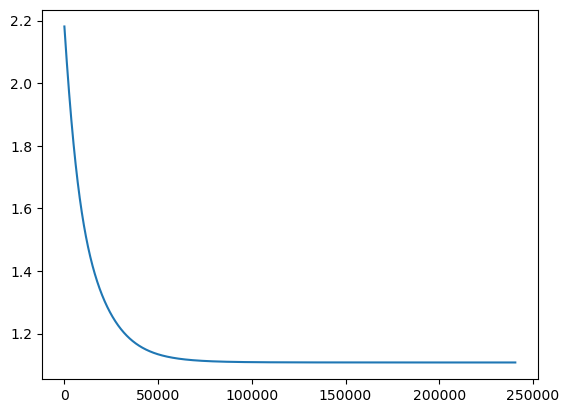

In [33]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
y = []
for i in range(2407):
    y.append(i * 100)
plt.plot(y, losses)
plt.show()

In [34]:

# Task4 train your model and plot the loss curve of training
trainx = pd.concat([df.iloc[0:236, 0:11], df.iloc[359:614, 0:11]],axis=0 )
trainy = pd.concat([df.iloc[0:236, 11], df.iloc[359:614, 11]],axis=0 )
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df.iloc[236:359, 0:11]    
testy = df.iloc[236:359, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses2 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses2)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc2 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.24295562]
200/10000000
loss :[2.23276832]
300/10000000
loss :[2.22264432]
400/10000000
loss :[2.21258388]
500/10000000
loss :[2.20258726]
600/10000000
loss :[2.19265473]
700/10000000
loss :[2.18278652]
800/10000000
loss :[2.17298289]
900/10000000
loss :[2.16324407]
1000/10000000
loss :[2.15357028]
1100/10000000
loss :[2.14396177]
1200/10000000
loss :[2.13441873]
1300/10000000
loss :[2.12494138]
1400/10000000
loss :[2.11552992]
1500/10000000
loss :[2.10618454]
1600/10000000
loss :[2.09690543]
1700/10000000
loss :[2.08769277]
1800/10000000
loss :[2.07854672]
1900/10000000
loss :[2.06946746]
2000/10000000
loss :[2.06045512]
2100/10000000
loss :[2.05150985]
2200/10000000
loss :[2.04263179]
2300/10000000
loss :[2.03382106]
2400/10000000
loss :[2.02507777]
2500/10000000
loss :[2.01640204]
2600/10000000
loss :[2.00779395]
2700/10000000
loss :[1.9992536]
2800/10000000
loss :[1.99078105]
2900/10000000
loss :[1.98237638]
3000/10000000
loss :[1.97403963]
3100/10000000
loss :

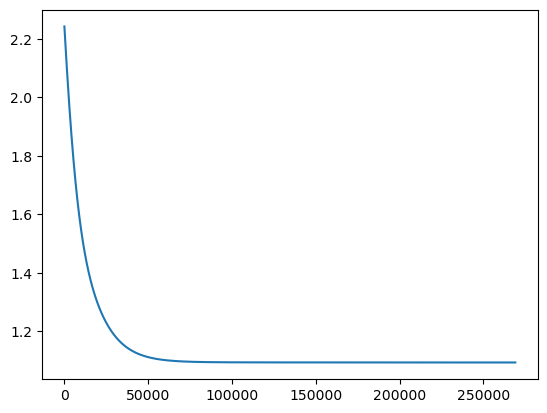

In [35]:
y_2 = []
for i in range(2692):
    y_2.append(i * 100)
plt.plot(y_2, losses2)
plt.show()

In [36]:
# Task4 train your model and plot the loss curve of training
trainx = pd.concat([df.iloc[0:123, 0:11], df.iloc[236:614, 0:11]],axis=0 )
trainy = pd.concat([df.iloc[0:123, 11], df.iloc[236:614, 11]],axis=0 )
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df.iloc[123:236, 0:11]    
testy = df.iloc[123:236, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses3 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses3)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc3 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.22138475]
200/10000000
loss :[2.21142695]
300/10000000
loss :[2.20153184]
400/10000000
loss :[2.19169973]
500/10000000
loss :[2.18193098]
600/10000000
loss :[2.17222591]
700/10000000
loss :[2.16258484]
800/10000000
loss :[2.15300809]
900/10000000
loss :[2.14349596]
1000/10000000
loss :[2.13404875]
1100/10000000
loss :[2.12466677]
1200/10000000
loss :[2.1153503]
1300/10000000
loss :[2.10609961]
1400/10000000
loss :[2.09691498]
1500/10000000
loss :[2.08779666]
1600/10000000
loss :[2.07874492]
1700/10000000
loss :[2.06975997]
1800/10000000
loss :[2.06084207]
1900/10000000
loss :[2.05199143]
2000/10000000
loss :[2.04320825]
2100/10000000
loss :[2.03449274]
2200/10000000
loss :[2.02584507]
2300/10000000
loss :[2.01726543]
2400/10000000
loss :[2.00875396]
2500/10000000
loss :[2.00031083]
2600/10000000
loss :[1.99193615]
2700/10000000
loss :[1.98363006]
2800/10000000
loss :[1.97539266]
2900/10000000
loss :[1.96722403]
3000/10000000
loss :[1.95912426]
3100/10000000
loss :

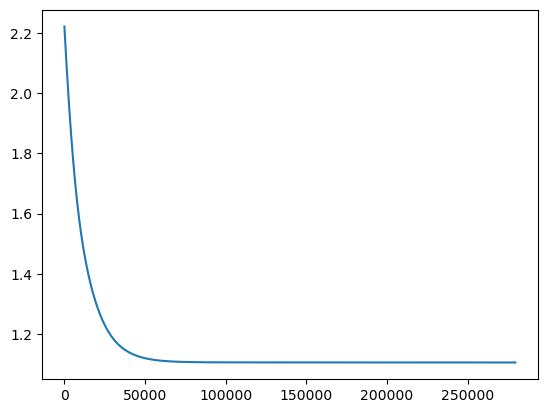

In [37]:
y_3 = []
for i in range(2797):
    y_3.append(i * 100)
plt.plot(y_3, losses3)
plt.show()

In [38]:
# Task4 train your model and plot the loss curve of training
trainx = pd.concat([df.iloc[0:369, 0:11], df.iloc[491:614, 0:11]],axis=0 )
trainy = pd.concat([df.iloc[0:369, 11], df.iloc[491:614, 11]],axis=0 )
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df.iloc[369:491, 0:11]    
testy = df.iloc[369:491, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses4 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses4)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc4 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.16908437]
200/10000000
loss :[2.16008507]
300/10000000
loss :[2.15114872]
400/10000000
loss :[2.14227542]
500/10000000
loss :[2.13346527]
600/10000000
loss :[2.12471838]
700/10000000
loss :[2.11603484]
800/10000000
loss :[2.10741473]
900/10000000
loss :[2.09885812]
1000/10000000
loss :[2.09036508]
1100/10000000
loss :[2.08193565]
1200/10000000
loss :[2.07356989]
1300/10000000
loss :[2.06526784]
1400/10000000
loss :[2.05702952]
1500/10000000
loss :[2.04885495]
1600/10000000
loss :[2.04074414]
1700/10000000
loss :[2.0326971]
1800/10000000
loss :[2.0247138]
1900/10000000
loss :[2.01679424]
2000/10000000
loss :[2.00893837]
2100/10000000
loss :[2.00114617]
2200/10000000
loss :[1.99341759]
2300/10000000
loss :[1.98575255]
2400/10000000
loss :[1.97815101]
2500/10000000
loss :[1.97061286]
2600/10000000
loss :[1.96313803]
2700/10000000
loss :[1.95572641]
2800/10000000
loss :[1.94837789]
2900/10000000
loss :[1.94109236]
3000/10000000
loss :[1.93386967]
3100/10000000
loss :[

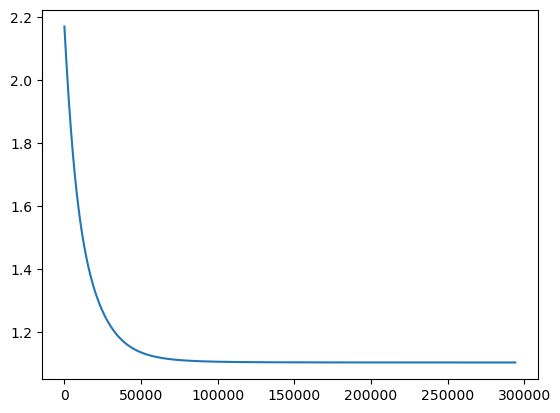

In [39]:
y_4 = []
for i in range(2943):
    y_4.append(i * 100)
plt.plot(y_4, losses4)
plt.show()

In [40]:
# Task4 train your model and plot the loss curve of training
trainx = df.iloc[0:491, 0:11]
trainy = df.iloc[0:491, 11]
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df.iloc[491:614, 0:11]    
testy = df.iloc[491:614, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses5 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses5)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc5 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.29096908]
200/10000000
loss :[2.2806582]
300/10000000
loss :[2.27040665]
400/10000000
loss :[2.26021472]
500/10000000
loss :[2.2500827]
600/10000000
loss :[2.24001085]
700/10000000
loss :[2.22999946]
800/10000000
loss :[2.22004878]
900/10000000
loss :[2.21015907]
1000/10000000
loss :[2.20033059]
1100/10000000
loss :[2.19056358]
1200/10000000
loss :[2.18085828]
1300/10000000
loss :[2.17121492]
1400/10000000
loss :[2.16163372]
1500/10000000
loss :[2.15211491]
1600/10000000
loss :[2.14265869]
1700/10000000
loss :[2.13326526]
1800/10000000
loss :[2.12393481]
1900/10000000
loss :[2.11466754]
2000/10000000
loss :[2.1054636]
2100/10000000
loss :[2.09632318]
2200/10000000
loss :[2.08724642]
2300/10000000
loss :[2.07823348]
2400/10000000
loss :[2.06928449]
2500/10000000
loss :[2.06039958]
2600/10000000
loss :[2.05157887]
2700/10000000
loss :[2.04282246]
2800/10000000
loss :[2.03413047]
2900/10000000
loss :[2.02550296]
3000/10000000
loss :[2.01694003]
3100/10000000
loss :[2

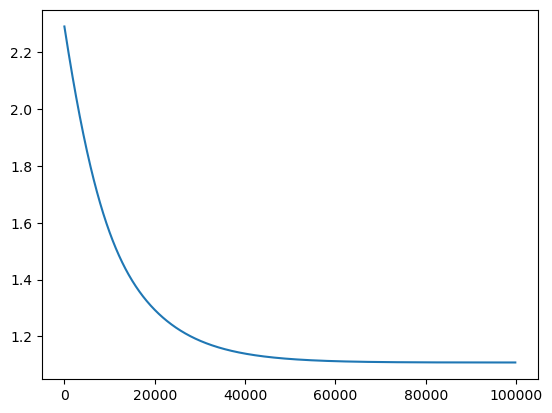

In [41]:
y_5 = []
for i in range(999):
    y_5.append(i * 100)
plt.plot(y_5, losses5)
plt.show()

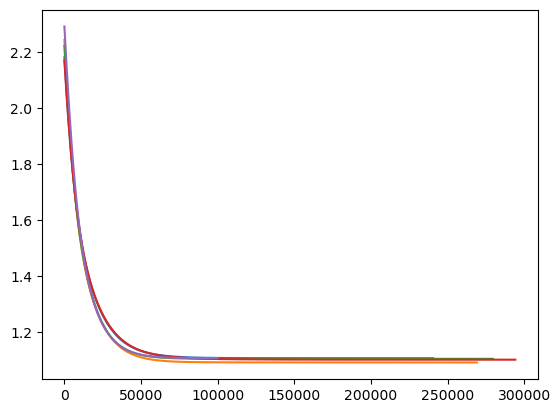

In [42]:
plt.plot(y, losses)
plt.plot(y_2, losses2)
plt.plot(y_3, losses3)
plt.plot(y_4, losses4)
plt.plot(y_5, losses5)
plt.show()

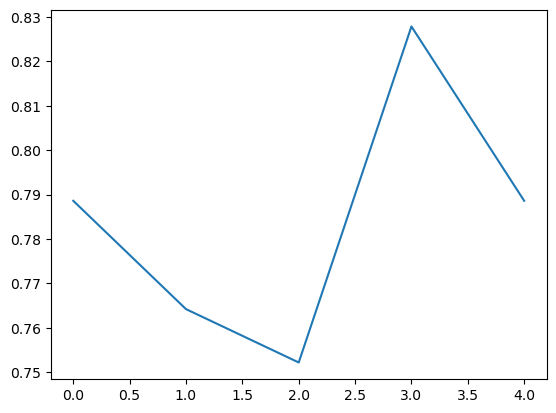

In [43]:
y = []
acc = []
for i in range(5):
    y.append(i)
acc.append(acc1)
acc.append(acc2)
acc.append(acc3)
acc.append(acc4)
acc.append(acc5)
plt.plot(y,acc)
plt.show()

In [44]:
df1 = pd.read_csv('loan.csv')
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:


male_yes =  len(df1[(df1['Loan_Status'] == 'Y') & (df1['Gender'] == 'Male')  ])
male_no =   len(df1[(df1['Loan_Status'] == 'N') & (df1['Gender'] == 'Male')  ])
female_yes =len(df1[(df1['Loan_Status'] == 'Y') & (df1['Gender'] == 'Female')])
female_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Gender'] == 'Female')])
male_yes, male_no, female_yes, female_no ,male_yes/male_no, female_yes/female_no



(339, 150, 75, 37, 2.26, 2.027027027027027)

In [46]:
male_replace = male_yes/male_no / (male_yes/male_no + female_yes/female_no)
female_replace = female_yes/female_no / (male_yes/male_no + female_yes/female_no)
gender_n_repalce = (male_replace + female_replace)/2
male_replace,female_replace, gender_n_repalce

(0.5271718572689446, 0.4728281427310554, 0.5)

In [47]:
graduate_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Education'] == 'Graduate')  ])
graduate_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Education'] == 'Graduate')  ])
ngraduate_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Education'] == 'Not Graduate')  ])
ngraduate_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Education'] == 'Not Graduate')  ])
graduate_yes, graduate_no, ngraduate_yes, ngraduate_no, graduate_yes/graduate_no,ngraduate_yes/ngraduate_no

(340, 140, 82, 52, 2.4285714285714284, 1.5769230769230769)

In [48]:
graduate_replace =  graduate_yes/graduate_no / (graduate_yes/graduate_no + ngraduate_yes/ngraduate_no)
ngraduate_replace = ngraduate_yes/ngraduate_no / (graduate_yes/graduate_no + ngraduate_yes/ngraduate_no)
graduate_replace, ngraduate_replace,

(0.6063100137174211, 0.39368998628257884)

In [49]:
married_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Married'] == 'Yes')  ])
married_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Married'] == 'Yes')  ])
nmarried_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Married'] == 'No')  ])
nmarried_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Married'] == 'No')  ])
married_yes,married_no,nmarried_yes,nmarried_no,married_yes/married_no,nmarried_yes/nmarried_no

(285, 113, 134, 79, 2.52212389380531, 1.6962025316455696)

In [50]:
married_replace = married_yes/married_no / (married_yes/married_no + nmarried_yes/nmarried_no)
nmarried_replace = nmarried_yes/nmarried_no / (married_yes/married_no + nmarried_yes/nmarried_no)
married_n_replace = (married_replace+nmarried_replace)/2.0
married_replace,nmarried_replace,married_n_replace

(0.5978968053748308, 0.4021031946251693, 0.5)

In [51]:
self_employed_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Self_Employed'] == 'Yes')  ])
self_employed_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Self_Employed'] == 'Yes')  ])
nself_employed_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Self_Employed'] == 'No')  ])
nself_employed_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Self_Employed'] == 'No')  ])
self_employed_yes,self_employed_no,nself_employed_yes,nself_employed_no,self_employed_yes/self_employed_no,nself_employed_yes/nself_employed_no



(56, 26, 343, 157, 2.1538461538461537, 2.1847133757961785)

In [52]:
self_employed_replace = self_employed_yes/self_employed_no/ (self_employed_yes/self_employed_no + nself_employed_yes/nself_employed_no)
nself_employed_replace = nself_employed_yes/nself_employed_no/ (self_employed_yes/self_employed_no + nself_employed_yes/nself_employed_no)
self_employed_n_replace = (nself_employed_replace + self_employed_replace)/2.0
self_employed_replace,nself_employed_replace,self_employed_n_replace


(0.4964426877470356, 0.5035573122529645, 0.5)

In [53]:
urban_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Property_Area'] == 'Urban')  ])
urban_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Property_Area'] == 'Urban')  ])
semiurban_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Property_Area'] == 'Semiurban')  ])
semiurban_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Property_Area'] == 'Semiurban')  ])
rural_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Property_Area'] == 'Rural')  ])
rural_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Property_Area'] == 'Rural')  ])
urban_yes,urban_no,semiurban_yes,semiurban_no,rural_yes,rural_no ,urban_yes/urban_no,semiurban_yes/semiurban_no,rural_yes/rural_no



(133,
 69,
 179,
 54,
 110,
 69,
 1.9275362318840579,
 3.314814814814815,
 1.5942028985507246)

In [54]:
urban_replace = urban_yes/urban_no/(urban_yes/urban_no+semiurban_yes/semiurban_no+rural_yes/rural_no)
semiurban_replace = semiurban_yes/semiurban_no/(urban_yes/urban_no+semiurban_yes/semiurban_no+rural_yes/rural_no)
rural_repalce = rural_yes/rural_no/(urban_yes/urban_no+semiurban_yes/semiurban_no+rural_yes/rural_no)
urban_replace,semiurban_replace,rural_repalce

(0.28194558944765047, 0.48486632905429283, 0.23318808149805678)

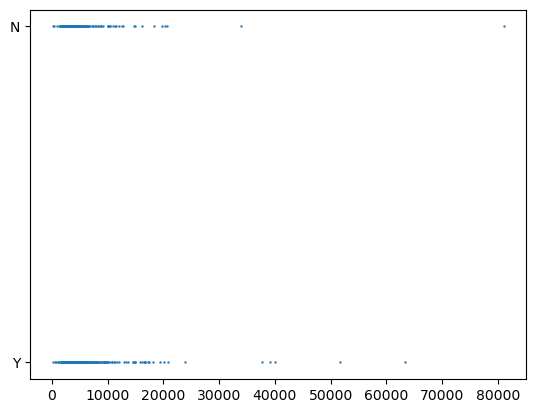

In [55]:
import matplotlib.pyplot as plt
x = df1["ApplicantIncome"]
y = df1["Loan_Status"]

plt.scatter(x, y,s=0.5)

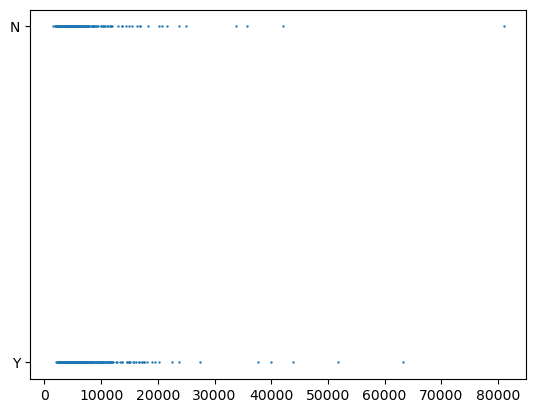

In [56]:
x = df1["CoapplicantIncome"]+df1["ApplicantIncome"]
y = df1["Loan_Status"]

plt.scatter(x, y,s=0.5)

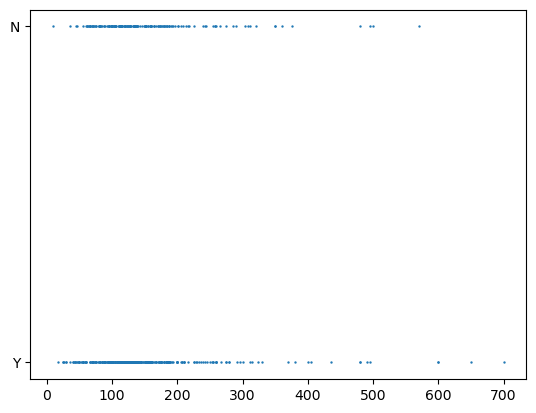

In [57]:

x = df1["LoanAmount"]
y = df1["Loan_Status"]

plt.scatter(x, y,s=0.5)

In [58]:

credit_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Credit_History'] == 1.0)  ])
credit_no = len(df1[(df1['Loan_Status'] == 'N') & (df1['Credit_History'] == 1.0)  ])

ncredit_yes = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Credit_History'] == 0.0)  ])
ncredit_no = len(df1[(df1['Loan_Status'] == 'Y') & (df1['Credit_History'] == 0.0)  ])
credit_yes,credit_no,ncredit_yes,ncredit_no,credit_yes/credit_no,ncredit_yes/ncredit_no

(378, 97, 7, 7, 3.8969072164948453, 1.0)

In [59]:
credit_replace = credit_yes/credit_no/(credit_yes/credit_no+ncredit_yes/ncredit_no)
ncredit_replace = ncredit_yes/ncredit_no/(credit_yes/credit_no+ncredit_yes/ncredit_no)
credit_replace,ncredit_replace

(0.7957894736842105, 0.20421052631578945)

In [60]:
df1.drop("Loan_ID", axis=1, inplace=True)
df1["Gender"] = df1["Gender"].map({"Male":male_replace,"Female":female_replace})
df1["Gender"] = df1["Gender"].fillna(gender_n_repalce)
df1["Married"] = df1["Married"].map({"Yes":married_replace,"No":nmarried_replace})
df1["Married"] = df1["Married"].fillna(married_n_replace)
df1["Dependents"] = df1["Dependents"].map({"3+":4,"0":0,"1":1,"2":2,"3":3})
df1["Dependents"]= df1["Dependents"].astype(float)
df1["Dependents"] = df1["Dependents"].fillna(df1["Loan_Amount_Term"].mean())
df1["Education"] = df1["Education"].map({"Graduate":graduate_replace,"Not Graduate":ngraduate_replace})
df1["Self_Employed"] = df1["Self_Employed"].map({"No":nself_employed_replace,"Yes":self_employed_replace})
df1["Self_Employed"] = df1["Self_Employed"].fillna(self_employed_n_replace)
df1["LoanAmount"] = df1["LoanAmount"].fillna(df1["LoanAmount"].mean())
df1["Loan_Amount_Term"] = df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mean())
df1["Credit_History"] = df1["Credit_History"].map({1.0 : credit_replace, 0.0:ncredit_replace})
df1["Credit_History"] = df1["Credit_History"].fillna(0.5)
df1["Property_Area"] = df1["Property_Area"].map({"Rural":rural_repalce,"Semiurban":semiurban_replace,"Urban":urban_replace})
df1.iloc[:, 11] = df1.iloc[:, 11].apply(lambda x : 1 if x == 'Y' else 0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 57.7 KB


In [61]:
#from Logistic import LogisticRegression
#import Logistic_PB20061376 as lr
import Logistic as lr
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training
trainx = df1.iloc[123:614, 0:11]
trainy = df1.iloc[123:614, 11]
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df1.iloc[0:123, 0:11]    
testy = df1.iloc[0:123, 11]
testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc1 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.11491286]
200/10000000
loss :[2.10656985]
300/10000000
loss :[2.09828331]
400/10000000
loss :[2.09005336]
500/10000000
loss :[2.08188012]
600/10000000
loss :[2.07376368]
700/10000000
loss :[2.06570413]
800/10000000
loss :[2.05770158]
900/10000000
loss :[2.04975609]
1000/10000000
loss :[2.04186777]
1100/10000000
loss :[2.03403667]
1200/10000000
loss :[2.02626287]
1300/10000000
loss :[2.01854642]
1400/10000000
loss :[2.01088739]
1500/10000000
loss :[2.00328582]
1600/10000000
loss :[1.99574175]
1700/10000000
loss :[1.98825522]
1800/10000000
loss :[1.98082625]
1900/10000000
loss :[1.97345486]
2000/10000000
loss :[1.96614107]
2100/10000000
loss :[1.95888488]
2200/10000000
loss :[1.95168629]
2300/10000000
loss :[1.9445453]
2400/10000000
loss :[1.93746187]
2500/10000000
loss :[1.930436]
2600/10000000
loss :[1.92346764]
2700/10000000
loss :[1.91655674]
2800/10000000
loss :[1.90970327]
2900/10000000
loss :[1.90290717]
3000/10000000
loss :[1.89616835]
3100/10000000
loss :[1

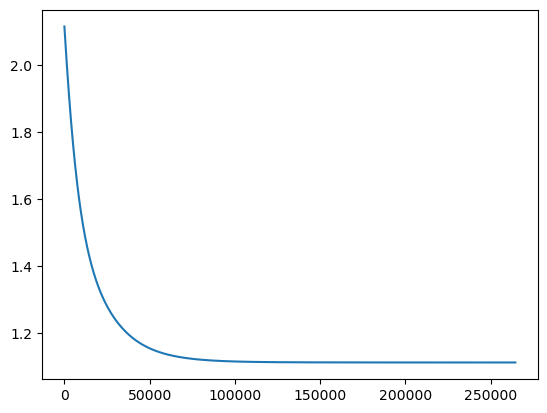

In [62]:
y = []
for i in range(2645):
    y.append(i * 100)
plt.plot(y, losses)
plt.show()

In [63]:
# Task4 train your model and plot the loss curve of training
trainx = pd.concat([df1.iloc[0:236, 0:11], df1.iloc[359:614, 0:11]],axis=0 )
trainy = pd.concat([df1.iloc[0:236, 11], df1.iloc[359:614, 11]],axis=0 )
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df1.iloc[236:359, 0:11]    
testy = df1.iloc[236:359, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses2 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses2)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc2 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.1205867]
200/10000000
loss :[2.11203192]
300/10000000
loss :[2.10353486]
400/10000000
loss :[2.09509555]
500/10000000
loss :[2.08671402]
600/10000000
loss :[2.07839032]
700/10000000
loss :[2.07012447]
800/10000000
loss :[2.06191649]
900/10000000
loss :[2.0537664]
1000/10000000
loss :[2.04567421]
1100/10000000
loss :[2.03763994]
1200/10000000
loss :[2.02966358]
1300/10000000
loss :[2.02174514]
1400/10000000
loss :[2.0138846]
1500/10000000
loss :[2.00608196]
1600/10000000
loss :[1.9983372]
1700/10000000
loss :[1.9906503]
1800/10000000
loss :[1.98302122]
1900/10000000
loss :[1.97544994]
2000/10000000
loss :[1.96793642]
2100/10000000
loss :[1.9604806]
2200/10000000
loss :[1.95308244]
2300/10000000
loss :[1.94574189]
2400/10000000
loss :[1.93845887]
2500/10000000
loss :[1.93123333]
2600/10000000
loss :[1.92406517]
2700/10000000
loss :[1.91695434]
2800/10000000
loss :[1.90990072]
2900/10000000
loss :[1.90290425]
3000/10000000
loss :[1.8959648]
3100/10000000
loss :[1.889

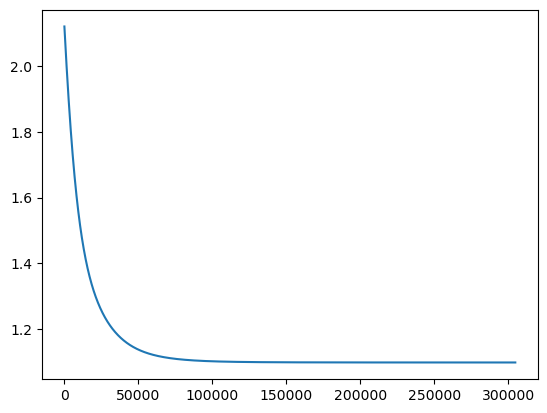

In [64]:

y_2 = []
for i in range(3049):
    y_2.append(i * 100)
plt.plot(y_2, losses2)
plt.show()

In [65]:
# Task4 train your model and plot the loss curve of training
trainx = pd.concat([df1.iloc[0:123, 0:11], df1.iloc[236:614, 0:11]],axis=0 )
trainy = pd.concat([df1.iloc[0:123, 11], df1.iloc[236:614, 11]],axis=0 )
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df1.iloc[123:236, 0:11]    
testy = df1.iloc[123:236, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses3 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses3)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc3 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.0931318]
200/10000000
loss :[2.08459064]
300/10000000
loss :[2.07611461]
400/10000000
loss :[2.06770371]
500/10000000
loss :[2.05935795]
600/10000000
loss :[2.0510773]
700/10000000
loss :[2.04286175]
800/10000000
loss :[2.03471125]
900/10000000
loss :[2.02662576]
1000/10000000
loss :[2.01860524]
1100/10000000
loss :[2.01064961]
1200/10000000
loss :[2.00275881]
1300/10000000
loss :[1.99493274]
1400/10000000
loss :[1.98717131]
1500/10000000
loss :[1.97947443]
1600/10000000
loss :[1.97184198]
1700/10000000
loss :[1.96427383]
1800/10000000
loss :[1.95676985]
1900/10000000
loss :[1.94932991]
2000/10000000
loss :[1.94195385]
2100/10000000
loss :[1.9346415]
2200/10000000
loss :[1.92739271]
2300/10000000
loss :[1.92020728]
2400/10000000
loss :[1.91308504]
2500/10000000
loss :[1.90602579]
2600/10000000
loss :[1.89902932]
2700/10000000
loss :[1.89209542]
2800/10000000
loss :[1.88522386]
2900/10000000
loss :[1.87841442]
3000/10000000
loss :[1.87166685]
3100/10000000
loss :[1

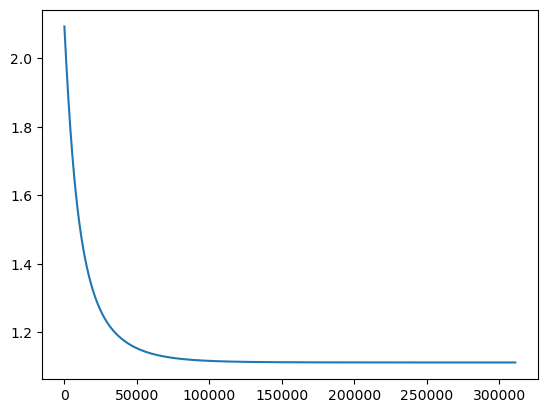

In [66]:

y_3 = []
for i in range(3113):
    y_3.append(i * 100)
plt.plot(y_3, losses3)
plt.show()

In [67]:
# Task4 train your model and plot the loss curve of training
trainx = pd.concat([df1.iloc[0:369, 0:11], df1.iloc[491:614, 0:11]],axis=0 )
trainy = pd.concat([df1.iloc[0:369, 11], df1.iloc[491:614, 11]],axis=0 )
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df1.iloc[369:491, 0:11]    
testy = df1.iloc[369:491, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses4 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses4)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc4 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.06091486]
200/10000000
loss :[2.05329235]
300/10000000
loss :[2.04572478]
400/10000000
loss :[2.03821214]
500/10000000
loss :[2.03075441]
600/10000000
loss :[2.02335156]
700/10000000
loss :[2.01600358]
800/10000000
loss :[2.00871042]
900/10000000
loss :[2.00147204]
1000/10000000
loss :[1.99428839]
1100/10000000
loss :[1.98715944]
1200/10000000
loss :[1.98008511]
1300/10000000
loss :[1.97306535]
1400/10000000
loss :[1.96610008]
1500/10000000
loss :[1.95918922]
1600/10000000
loss :[1.9523327]
1700/10000000
loss :[1.94553043]
1800/10000000
loss :[1.93878231]
1900/10000000
loss :[1.93208823]
2000/10000000
loss :[1.9254481]
2100/10000000
loss :[1.91886179]
2200/10000000
loss :[1.91232919]
2300/10000000
loss :[1.90585017]
2400/10000000
loss :[1.8994246]
2500/10000000
loss :[1.89305233]
2600/10000000
loss :[1.88673323]
2700/10000000
loss :[1.88046713]
2800/10000000
loss :[1.87425389]
2900/10000000
loss :[1.86809333]
3000/10000000
loss :[1.8619853]
3100/10000000
loss :[1.

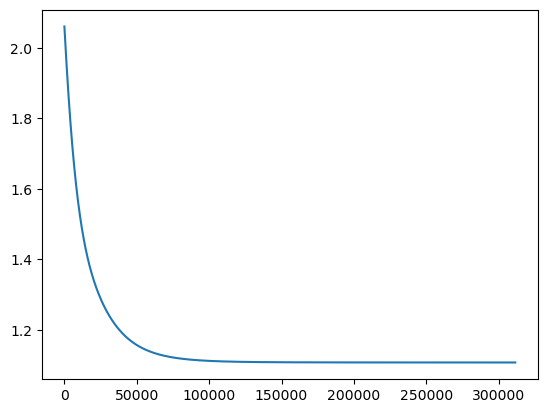

In [68]:

y_4 = []
for i in range(3116):
    y_4.append(i * 100)
plt.plot(y_4, losses4)
plt.show()

In [69]:
# Task4 train your model and plot the loss curve of training
trainx = df1.iloc[0:491, 0:11]
trainy = df1.iloc[0:491, 11]
trainy = np.array(trainy).reshape(len(trainy), 1)
#print(trainy.shape)
testx = df1.iloc[491:614, 0:11]    
testy = df1.iloc[491:614, 11] 

testy = np.array(testy).reshape(len(testy), 1)
#print(testy)
losses5 = []
LR = lr.LogisticRegression(learning_rate= 0.0001, interations= 10000000)
LR.fit( trainx, trainy, losses5)
p = LR.predict(testx)
right = 0
for i in range(p.shape[0]):
    if p[i] == testy[i]:
        right += 1
acc5 = right / p.shape[0]
print(right / p.shape[0])

100/10000000
loss :[2.16915819]
200/10000000
loss :[2.16010855]
300/10000000
loss :[2.15111552]
400/10000000
loss :[2.14217925]
500/10000000
loss :[2.1332999]
600/10000000
loss :[2.12447764]
700/10000000
loss :[2.11571261]
800/10000000
loss :[2.10700495]
900/10000000
loss :[2.09835481]
1000/10000000
loss :[2.08976231]
1100/10000000
loss :[2.08122758]
1200/10000000
loss :[2.07275074]
1300/10000000
loss :[2.06433191]
1400/10000000
loss :[2.05597119]
1500/10000000
loss :[2.04766868]
1600/10000000
loss :[2.03942449]
1700/10000000
loss :[2.03123869]
1800/10000000
loss :[2.02311138]
1900/10000000
loss :[2.01504262]
2000/10000000
loss :[2.00703248]
2100/10000000
loss :[1.99908103]
2200/10000000
loss :[1.99118832]
2300/10000000
loss :[1.98335439]
2400/10000000
loss :[1.97557929]
2500/10000000
loss :[1.96786305]
2600/10000000
loss :[1.96020568]
2700/10000000
loss :[1.95260722]
2800/10000000
loss :[1.94506766]
2900/10000000
loss :[1.93758702]
3000/10000000
loss :[1.93016529]
3100/10000000
loss :

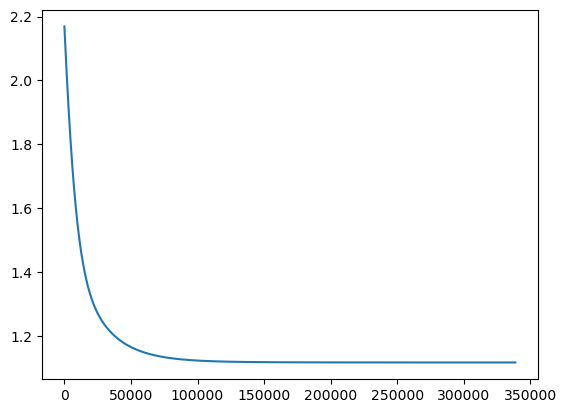

In [70]:

y_5 = []
for i in range(3387):
    y_5.append(i * 100)

plt.plot(y_5, losses5)
plt.show()

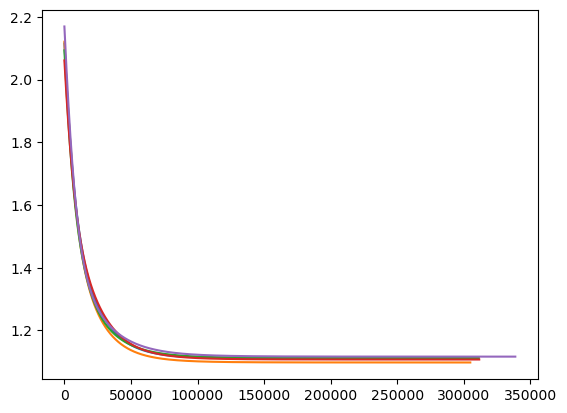

In [71]:
plt.plot(y, losses)
plt.plot(y_2, losses2)
plt.plot(y_3, losses3)
plt.plot(y_4, losses4)
plt.plot(y_5, losses5)
plt.show()

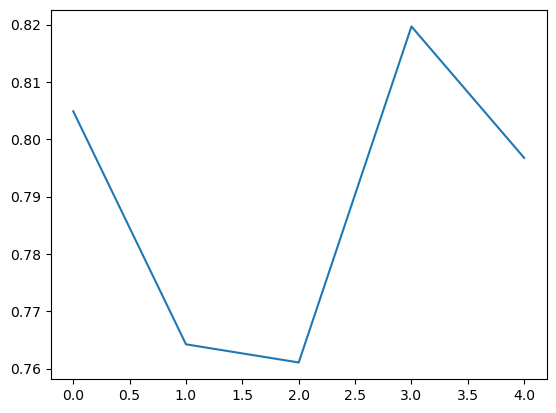

In [72]:
y = []
acc_2 = []
for i in range(5):
    y.append(i)
acc_2.append(acc1)
acc_2.append(acc2)
acc_2.append(acc3)
acc_2.append(acc4)
acc_2.append(acc5)
plt.plot(y,acc_2)
plt.show()

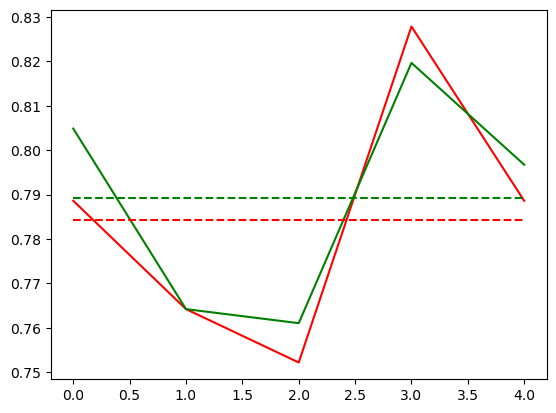

(0.7843089312947387, 0.7893175473173563)

In [73]:
mean_1 = []
mean_2 = []
for i in range(5):
    mean_1.append(np.mean(acc))
    mean_2.append(np.mean(acc_2))
plt.plot(y,acc, 'r',acc_2, 'g', mean_1, 'r--', mean_2, 'g--')
plt.plot()
plt.show()
np.mean(acc),np.mean(acc_2)